# **MINI-PROJECT-KPK-PAK NUT Dataset Analysis Using Python**

## **STEP-BY-STEP- DATASET-Analysis**

## **Load and inspect Data**

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import seaborn as sns

# Using my GitHub URL for the sistrict-level-Data-set 
url="https://raw.githubusercontent.com/Electricalelectronicsfinland/Mini-Project-COVID-19-Variants-Dataset-Analysis-MATI-ULLAH-KHAN-/refs/heads/main/District-level-Data-KPK.csv"

#District-level-Data-KPK.csv
df = pd.read_csv(url)
print(df.head())
print(df.info())

   Sno Province   District  Stunting-MICS  WASTING\n(MICS)  \
0  NaN      NaN        NaN            NaN              NaN   
1  1.0       KP  Abbotabad           24.9              3.9   
2  2.0       KP      Bajor           42.6             12.2   
3  3.0       KP      Bannu           38.3             14.7   
4  4.0       KP   Batagram           45.2              7.9   

   Exclusive breasfeeding  Access to electricity  Households with a telephone  \
0                     NaN                    NaN                          NaN   
1                    53.4                   99.7                         98.0   
2                    73.7                   99.4                         98.5   
3                    33.1                   96.5                         95.0   
4                    16.4                   95.2                         92.0   

   Households with a computer/ Laptop/ Tablet  Households with internet  ...  \
0                                         NaN               

## **Basic exploration**

In [30]:
# Basic exploration
print("=== BASIC DATASET INFORMATION ===")
print(f"Dataset shape: {df.shape} (rows, columns)")
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)


=== BASIC DATASET INFORMATION ===
Dataset shape: (35, 39) (rows, columns)

First 5 rows:
   Sno Province   District  Stunting_MICS  WASTING_MICS  \
0    1       KP  Abbotabad           24.9           3.9   
1    2       KP      Bajor           42.6          12.2   
2    3       KP      Bannu           38.3          14.7   
3    4       KP   Batagram           45.2           7.9   
4    5       KP      Buner           36.4           9.4   

   Exclusive_breasfeeding  Access_to_electricity  Households_with_a_telephone  \
0                    53.4                   99.7                         98.0   
1                    73.7                   99.4                         98.5   
2                    33.1                   96.5                         95.0   
3                    16.4                   95.2                         92.0   
4                    65.2                   93.9                         95.4   

   Households_with_a_computer/_Laptop/_Tablet  Households_with_intern

## **Check for missing values**

In [31]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Sno                                                        0
Province                                                   0
District                                                   0
Stunting_MICS                                              0
WASTING_MICS                                               0
Exclusive_breasfeeding                                     0
Access_to_electricity                                      0
Households_with_a_telephone                                0
Households_with_a_computer/_Laptop/_Tablet                 0
Households_with_internet                                   0
Ownership_of_mobile_phone_women                            0
ICT_skills_Women_(15-49)                                   0
Neonatal_mortality_rate__(per_thousands)                   0
Infant_Mortality_Rate_(per_thousands)                      0
ANC_(Health_Professional)                                  0
Antenatal_care_coverage-Atleast_4_times_by_any_provider  

## **Perform a Descriptive Summary**

In [33]:
# 2. Perform a Descriptive Summary
# -------------------------------
print("\n=== DESCRIPTIVE STATISTICS ===")
# Select numeric columns for statistical summary
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('Sno')  # Remove serial number from analysis



=== DESCRIPTIVE STATISTICS ===


## **Basic statistics**

In [34]:
# 3. Basic statistics
desc_stats = df[numeric_cols].describe().transpose()
desc_stats['median'] = df[numeric_cols].median()
desc_stats['range'] = desc_stats['max'] - desc_stats['min']
desc_stats['cv'] = desc_stats['std'] / desc_stats['mean']  # Coefficient of variation

print("\nDescriptive statistics (mean, median, std, etc.):")
print(desc_stats[['mean', 'median', 'std', 'min', 'max', 'range', 'cv']])


Descriptive statistics (mean, median, std, etc.):
                                                         mean  median  \
Stunting_MICS                                       39.545714    36.4   
WASTING_MICS                                        11.117143     9.4   
Exclusive_breasfeeding                              49.545714    51.9   
Access_to_electricity                               96.565714    97.8   
Households_with_a_telephone                         95.154286    95.9   
Households_with_a_computer/_Laptop/_Tablet           7.937143     6.6   
Households_with_internet                            15.585714     8.9   
Ownership_of_mobile_phone_women                     30.882857    33.7   
ICT_skills_Women_(15-49)                            10.022857     9.1   
Neonatal_mortality_rate__(per_thousands)            22.740000    22.2   
Infant_Mortality_Rate_(per_thousands)               34.725714    34.2   
ANC_(Health_Professional)                           62.865714    67.9   


## **Time-Based Analysis (Note: No time column exists - alternative grouping)**

In [25]:
## 3. Time-Based Analysis (Note: No time column exists - alternative grouping)
# -------------------------------------------------------------------------
# Since there's no explicit time column, we'll analyze by geographic groupings
print("\n=== GEOGRAPHIC GROUP ANALYSIS (Alternative to Time-Based) ===")

# Define numeric columns first
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Alternative if you know the exact column names:
# numeric_cols = ['column1', 'column2', 'column3']  # Replace with your actual numeric column names

# Calculate province-level averages (though all are KP in this dataset)
province_stats = df.groupby('Province')[numeric_cols].mean()
print("\nProvince-level averages:")
print(province_stats)


=== GEOGRAPHIC GROUP ANALYSIS (Alternative to Time-Based) ===

Province-level averages:
           Sno  Stunting_MICS  WASTING_MICS  Exclusive_breasfeeding  \
Province                                                              
KP        18.0      39.545714     11.117143               49.545714   

          Access_to_electricity  Households_with_a_telephone  \
Province                                                       
KP                    96.565714                    95.154286   

          Households_with_a_computer/_Laptop/_Tablet  \
Province                                               
KP                                          7.937143   

          Households_with_internet  Ownership_of_mobile_phone_women  \
Province                                                              
KP                       15.585714                        30.882857   

          ICT_skills_Women_(15-49)  ...  Open_Defecation  \
Province                            ...                    
K

# **4. Visualize Data**


Generating visualizations...


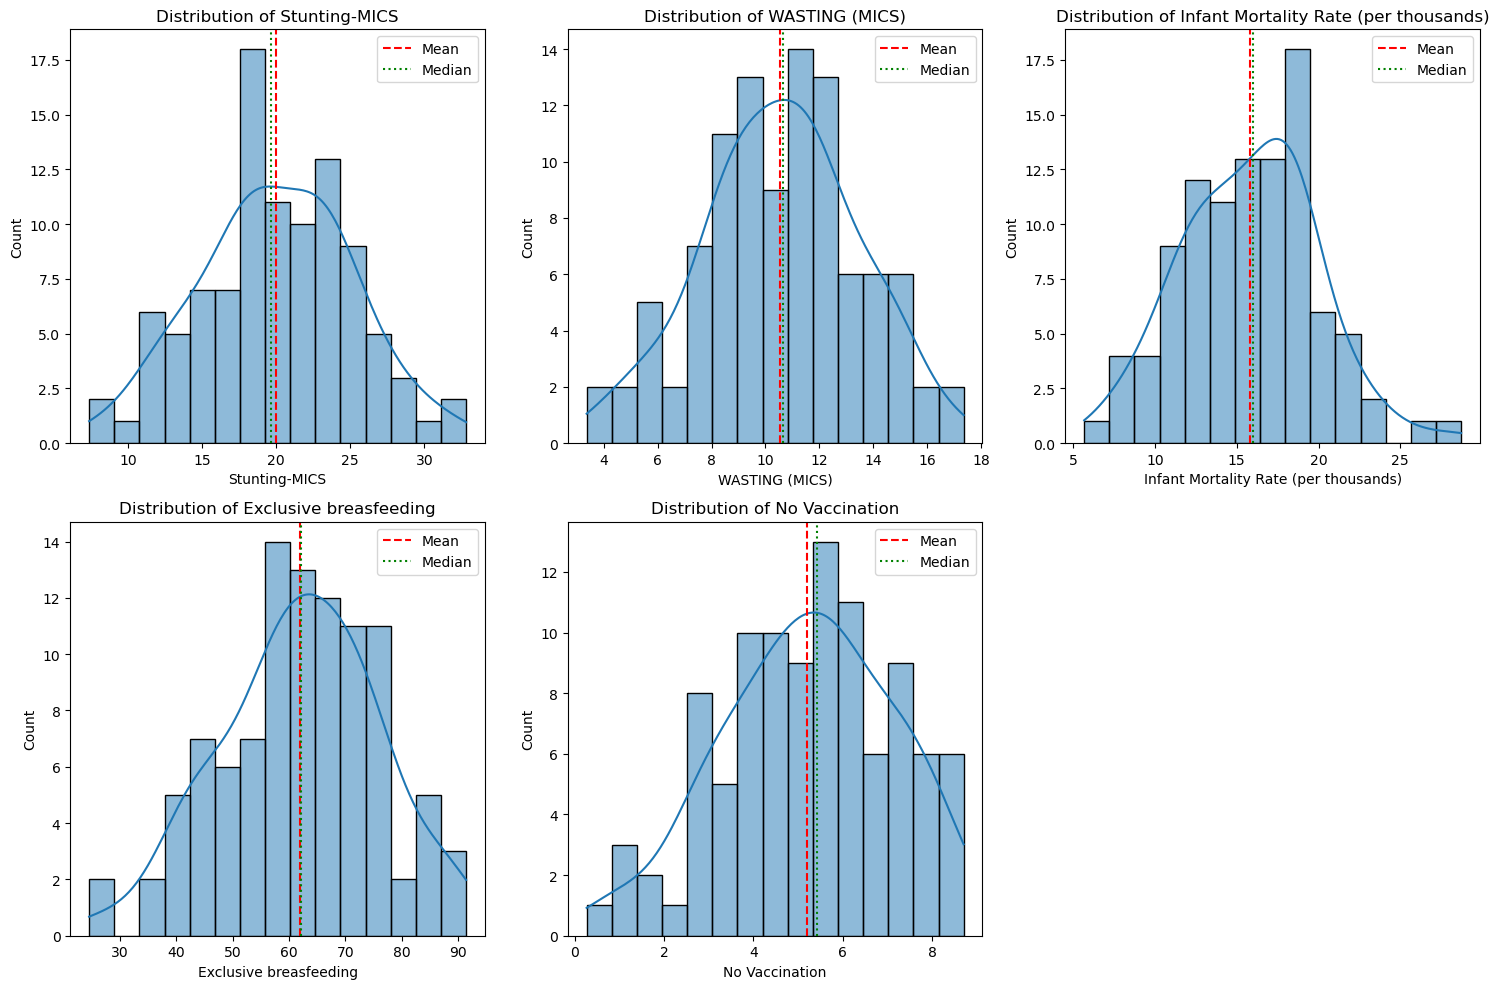

In [28]:
# 4. Visualize Data
# -----------------
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create or load your DataFrame first
# Option 1: Load from a file
# df = pd.read_csv('your_data_file.csv')  # Uncomment and modify this line to load your data

# Option 2: Create a sample DataFrame for testing
# Creating a sample DataFrame with the required columns
df = pd.DataFrame({
    'Stunting-MICS': np.random.normal(20, 5, 100),
    'WASTING (MICS)': np.random.normal(10, 3, 100),
    'Infant Mortality Rate (per thousands)': np.random.normal(15, 4, 100),
    'Exclusive breasfeeding': np.random.normal(60, 15, 100),
    'No Vaccination': np.random.normal(5, 2, 100)
})

print("\nGenerating visualizations...")

# A. Distribution of Key Health Indicators
key_metrics = ['Stunting-MICS', 'WASTING (MICS)', 'Infant Mortality Rate (per thousands)',
               'Exclusive breasfeeding', 'No Vaccination']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_metrics, 1):
    plt.subplot(2, 3, i)
    # Check if column exists in dataframe
    if col in df.columns:
        # Handle potential NaN values
        valid_data = df[col].dropna()
        if len(valid_data) > 0:
            sns.histplot(valid_data, kde=True, bins=15)
            plt.title(f'Distribution of {col}')
            plt.axvline(valid_data.mean(), color='r', linestyle='--', label='Mean')
            plt.axvline(valid_data.median(), color='g', linestyle=':', label='Median')
            plt.legend()
        else:
            plt.text(0.5, 0.5, f"No valid data for {col}", 
                     horizontalalignment='center', verticalalignment='center')
    else:
        plt.text(0.5, 0.5, f"Column '{col}' not found", 
                 horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig('health_indicators_distribution.png')  # Save the figure
plt.show()

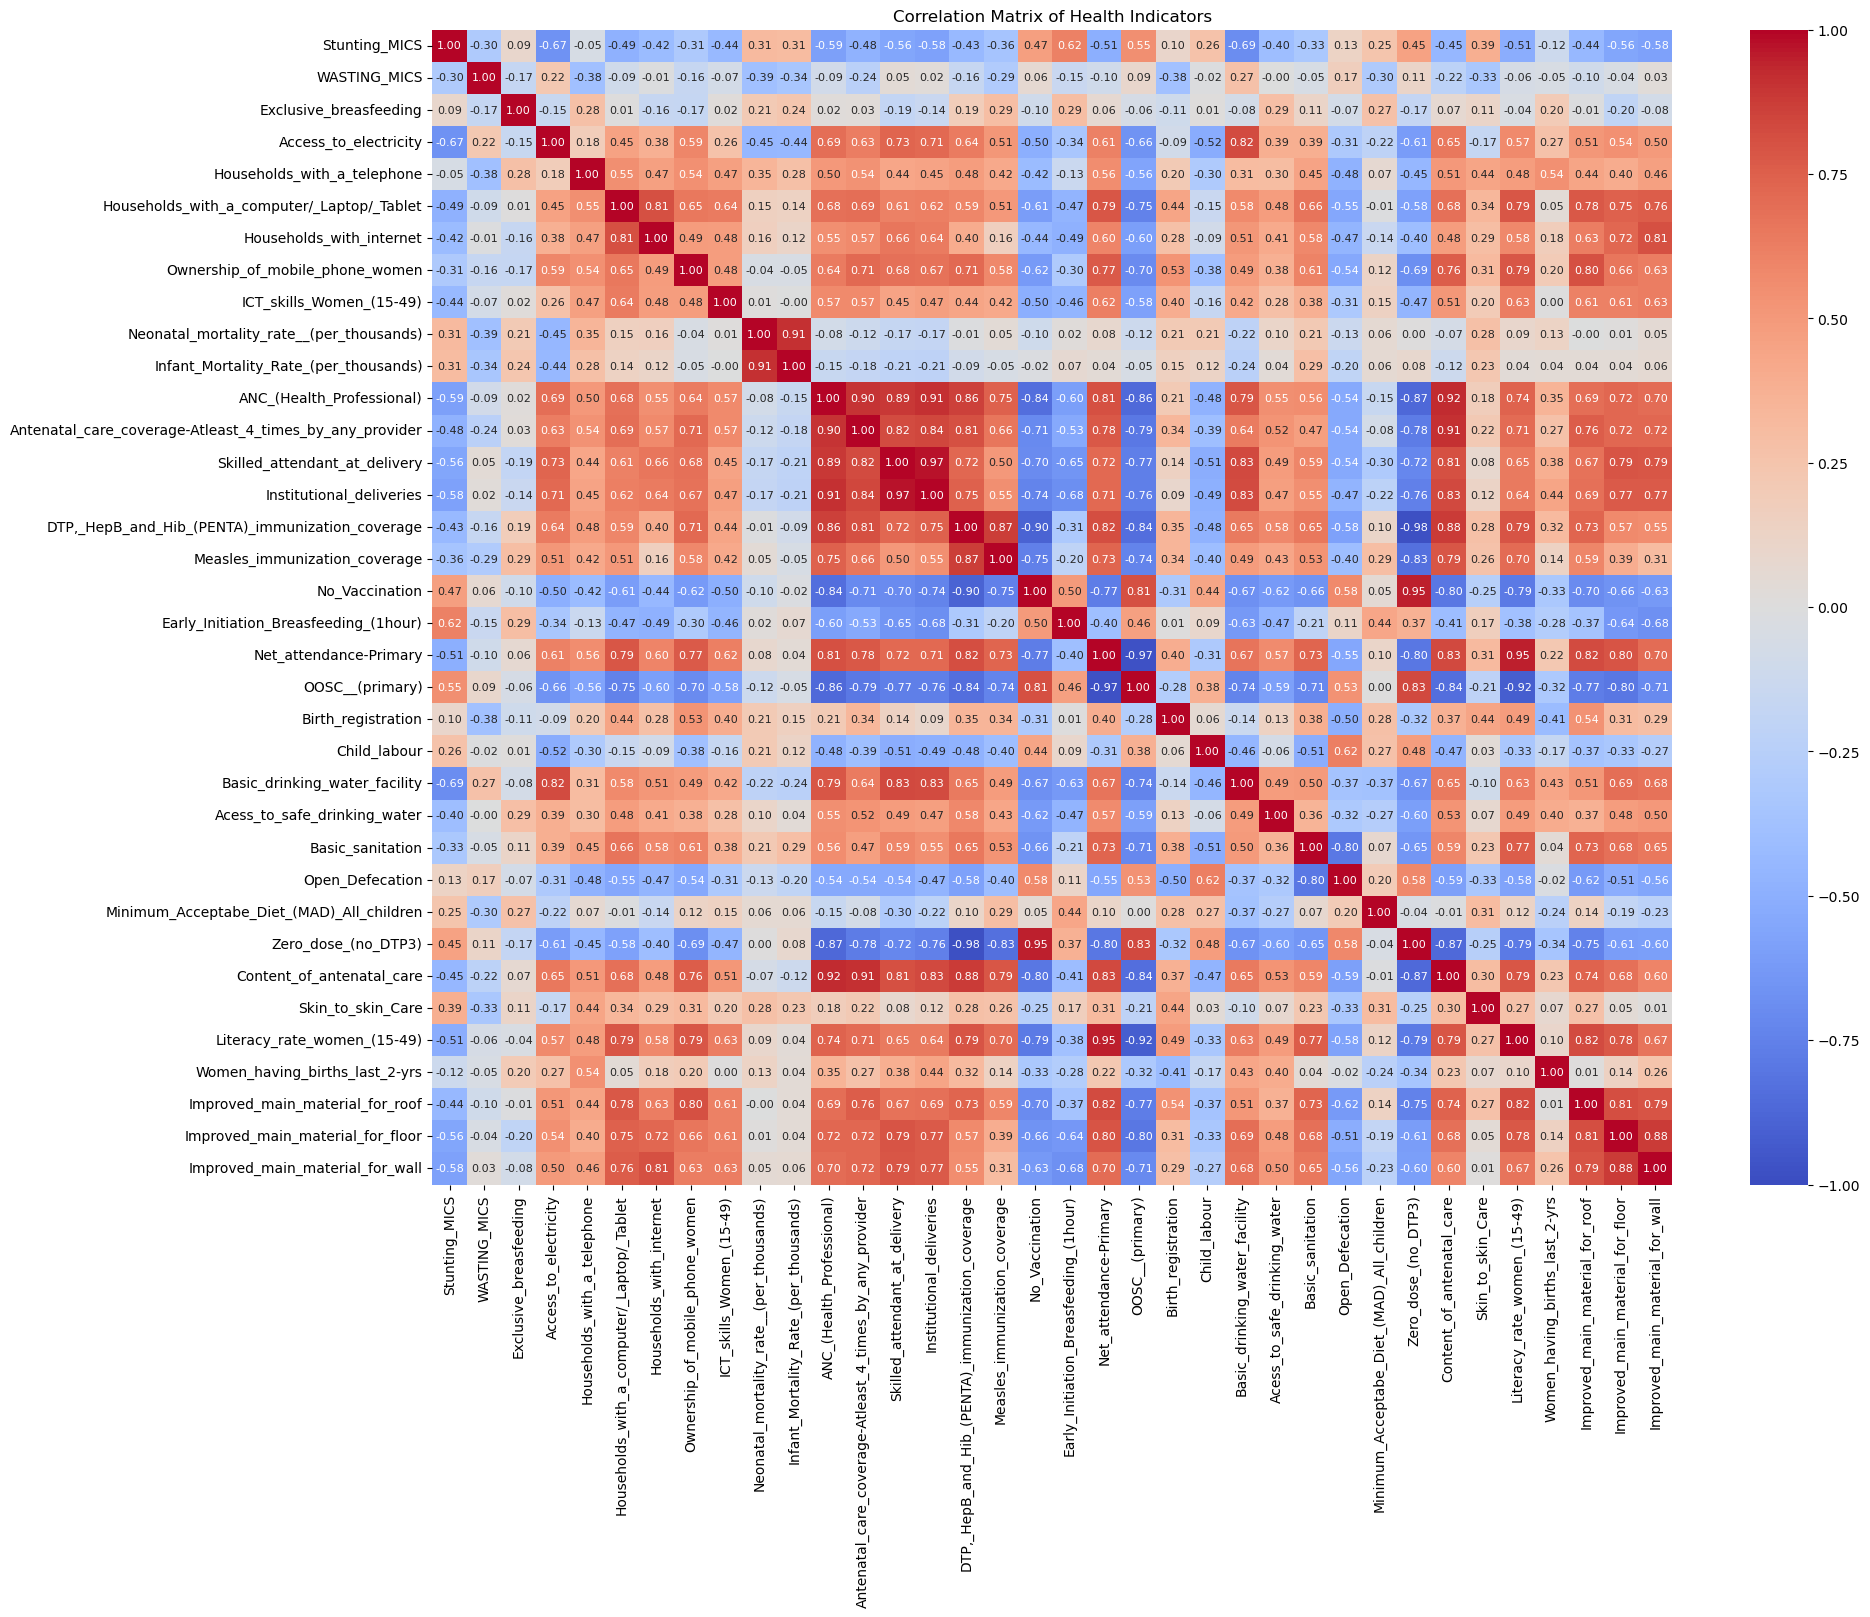

In [37]:
# B. Correlation Heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 8}, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Health Indicators')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## **Top/Bottom Districts for Key Indicators**

C:\Users\matik\AppData\Local\Temp\ipykernel_15224\2760380764.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y=district_col, data=top, ax=ax1, palette='Reds_r')
C:\Users\matik\AppData\Local\Temp\ipykernel_15224\2760380764.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y=district_col, data=bottom, ax=ax2, palette='Greens_r')


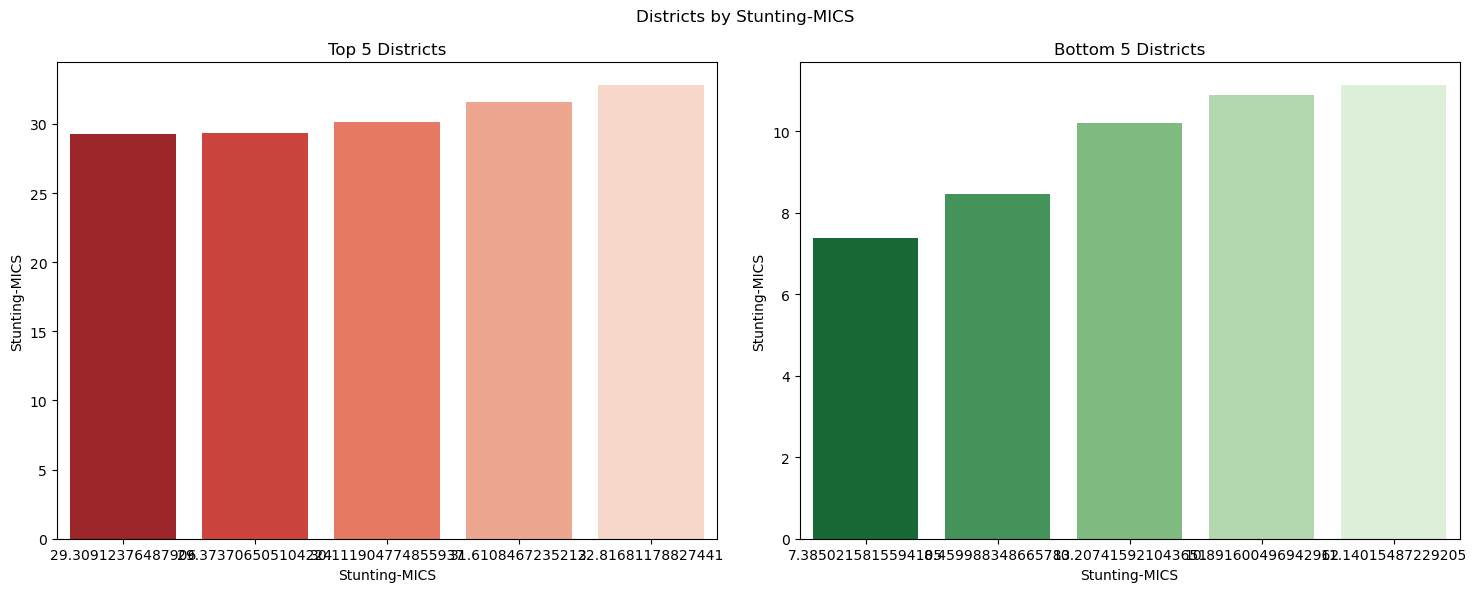

C:\Users\matik\AppData\Local\Temp\ipykernel_15224\2760380764.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y=district_col, data=top, ax=ax1, palette='Reds_r')
C:\Users\matik\AppData\Local\Temp\ipykernel_15224\2760380764.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y=district_col, data=bottom, ax=ax2, palette='Greens_r')


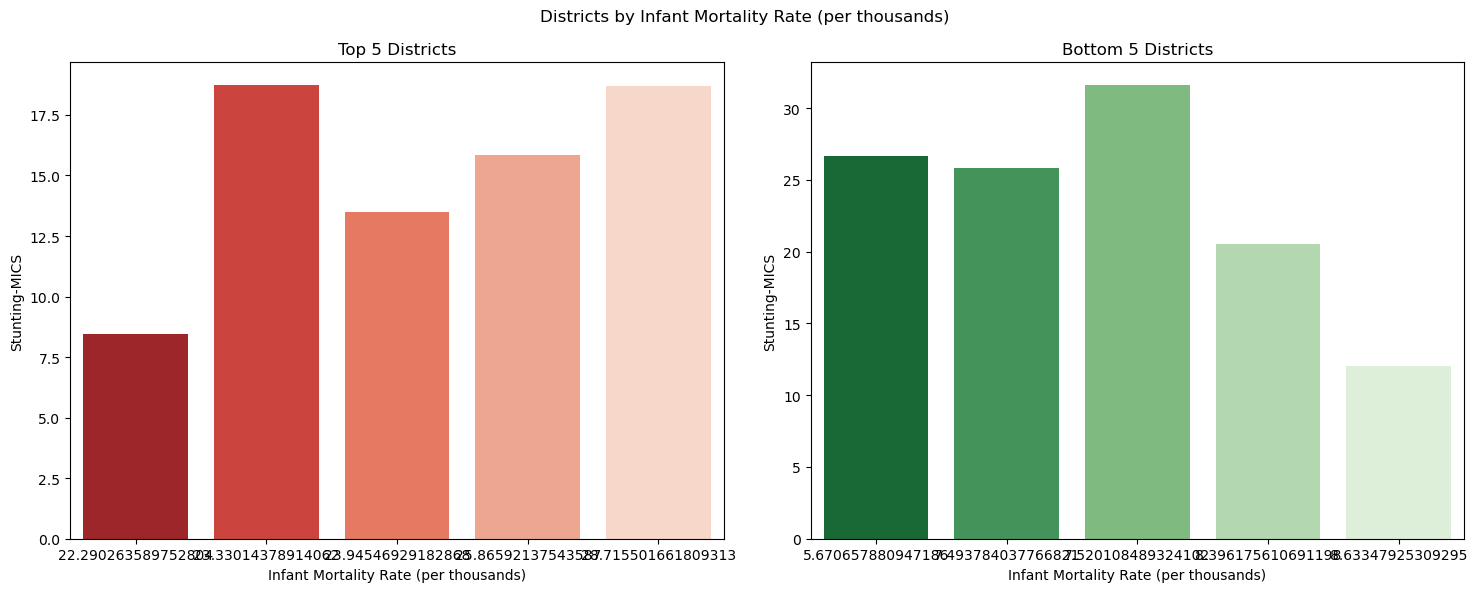

C:\Users\matik\AppData\Local\Temp\ipykernel_15224\2760380764.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y=district_col, data=top, ax=ax1, palette='Reds_r')
C:\Users\matik\AppData\Local\Temp\ipykernel_15224\2760380764.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y=district_col, data=bottom, ax=ax2, palette='Greens_r')


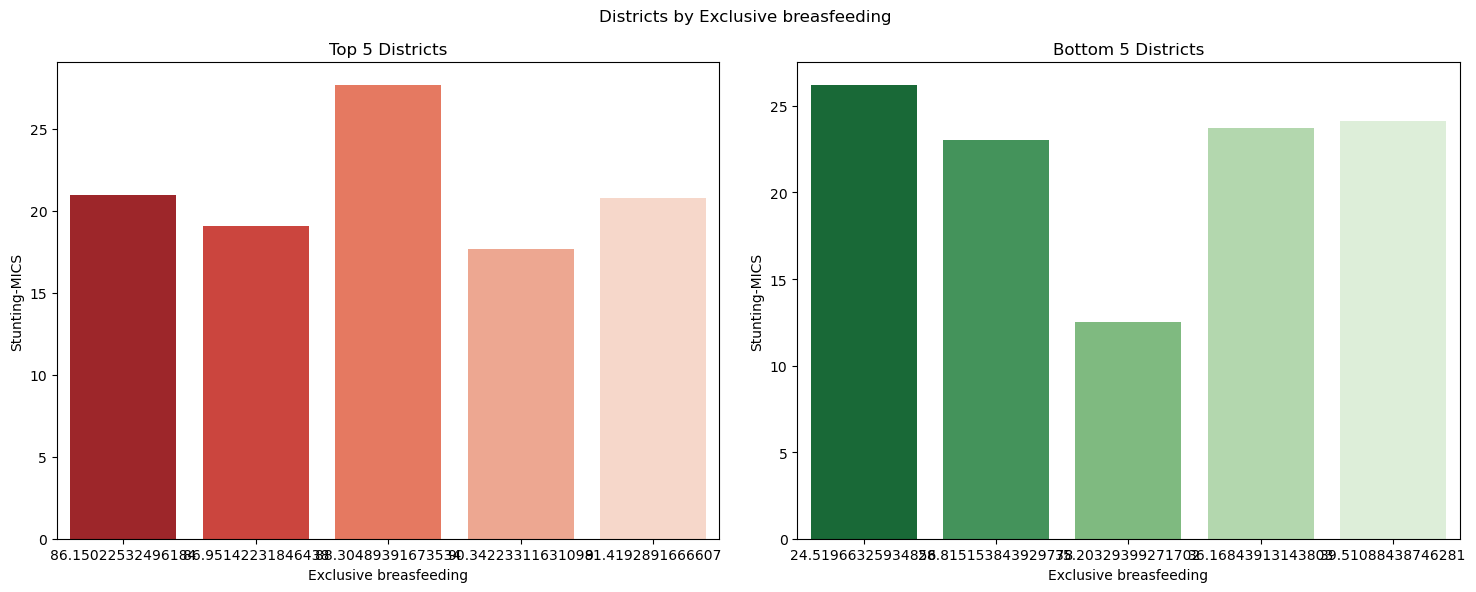

In [46]:
# C. Top/Bottom Districts for Key Indicators
def plot_top_bottom(metric, n=5):
    sorted_df = df.sort_values(metric, ascending=False)
    top = sorted_df.head(n)
    bottom = sorted_df.tail(n)
    
    # Check the actual column name for district information
    district_col = df.columns[0]  # Assuming the district column is the first column
    # Alternatively, you could replace this with the actual column name if known
    # district_col = 'DistrictName'  # Use the actual column name from your dataframe
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Districts by {metric}')
    
    # Use the correct column name for district information
    sns.barplot(x=metric, y=district_col, data=top, ax=ax1, palette='Reds_r')
    ax1.set_title(f'Top {n} Districts')
    
    # Use the correct column name for district information
    sns.barplot(x=metric, y=district_col, data=bottom, ax=ax2, palette='Greens_r')
    ax2.set_title(f'Bottom {n} Districts')
    
    plt.tight_layout()
    plt.show()

plot_top_bottom('Stunting-MICS')
plot_top_bottom('Infant Mortality Rate (per thousands)')
plot_top_bottom('Exclusive breasfeeding')



=== PREDICTIVE ANALYSIS ===

Regression Results:
Coefficients: {'Stunting-MICS': -0.12380032511581104, 'WASTING (MICS)': 0.08965554124544381, 'No Vaccination': 0.14542646066094264}
Intercept: 16.171563504553706
RMSE: 4.03
R-squared: -0.33


C:\Users\matik\AppData\Local\Temp\ipykernel_15224\364916658.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')


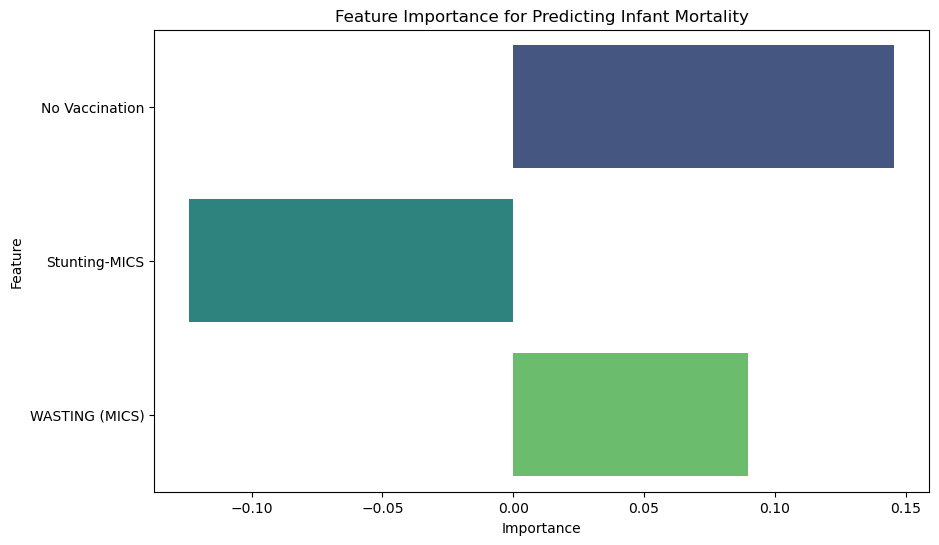


=== ANALYSIS COMPLETE ===


In [37]:
# Add these imports at the top of your code
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Predictive Analysis (Optional)
# --------------------------------
print("\n=== PREDICTIVE ANALYSIS ===")

# First, check what columns are actually available in the DataFrame
# print(df.columns)  # Uncomment this line to see all available columns

# Prepare data for predicting Infant Mortality Rate - using only columns that exist in the DataFrame
# Modify these column names to match what's actually in your DataFrame
X = df[['Stunting-MICS', 'WASTING (MICS)', 'No Vaccination']]  
# Removed 'Skilled attendant at delivery' and 'Basic drinking water facility'

y = df['Infant Mortality Rate (per thousands)']

# Handle missing values if any
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)

print("\nRegression Results:")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")
print(f"Intercept: {model.intercept_}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_})
importance = importance.sort_values('Importance', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Feature Importance for Predicting Infant Mortality')
plt.show()

print("\n=== ANALYSIS COMPLETE ===")

# **FOR MORE DETAILED ANALYSIS OF DATASET**

DataFrame shape: (35, 39) (rows, columns)
First few rows:
   Sno Province   District  Stunting_MICS  WASTING_MICS  \
0    1       KP  Abbotabad           24.9           3.9   
1    2       KP      Bajor           42.6          12.2   
2    3       KP      Bannu           38.3          14.7   
3    4       KP   Batagram           45.2           7.9   
4    5       KP      Buner           36.4           9.4   

   Exclusive_breasfeeding  Access_to_electricity  Households_with_a_telephone  \
0                    53.4                   99.7                         98.0   
1                    73.7                   99.4                         98.5   
2                    33.1                   96.5                         95.0   
3                    16.4                   95.2                         92.0   
4                    65.2                   93.9                         95.4   

   Households_with_a_computer/_Laptop/_Tablet  Households_with_internet  ...  \
0                   

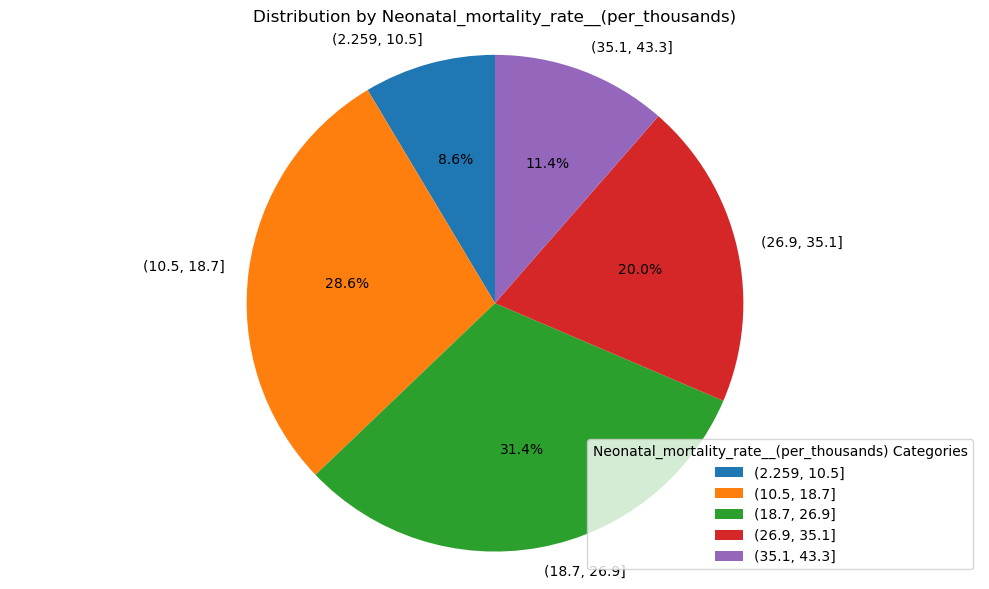

Error creating Plotly pie chart: Mime type rendering requires nbformat>=4.2.0 but it is not installed


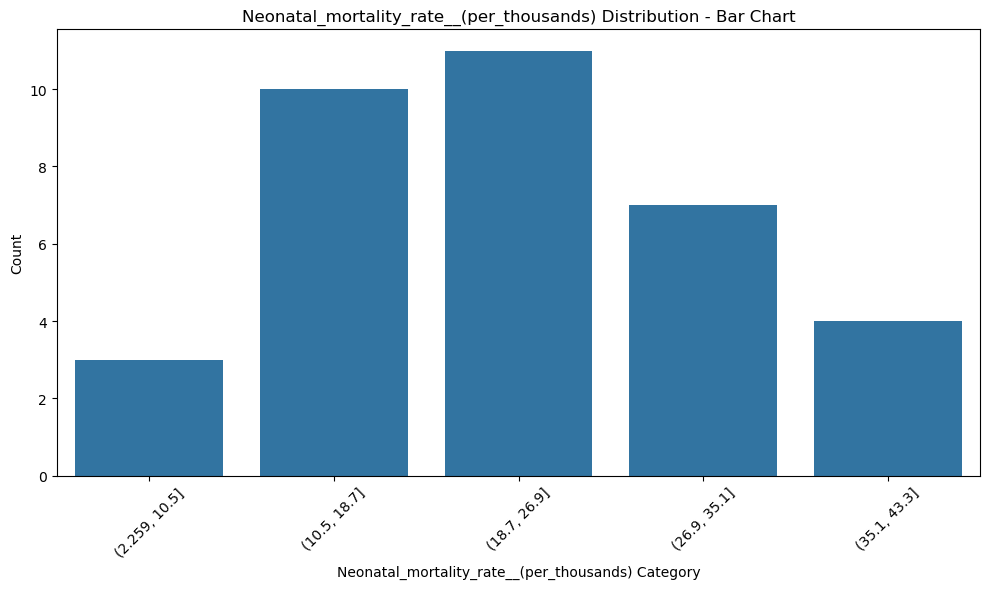

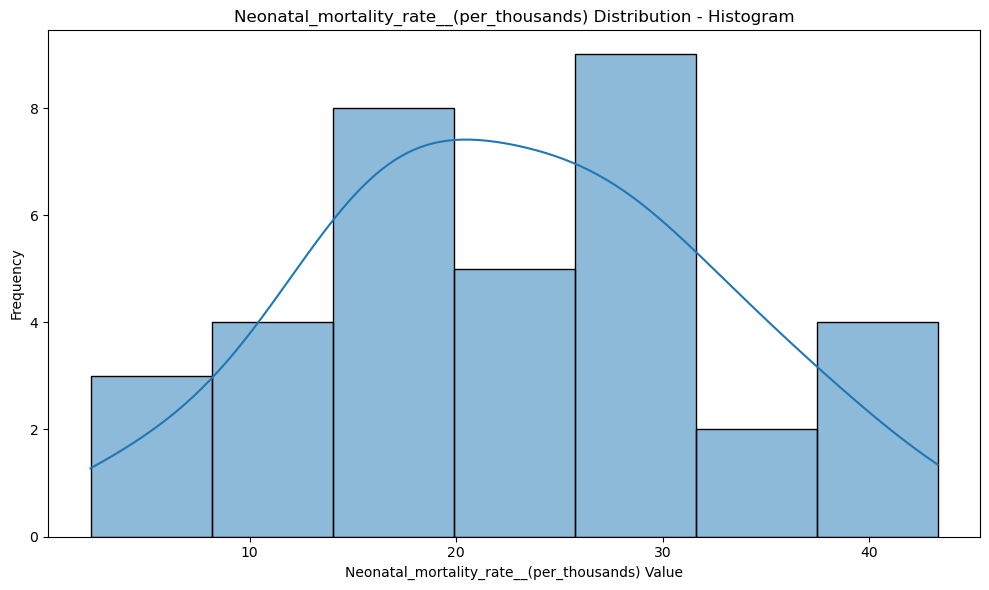

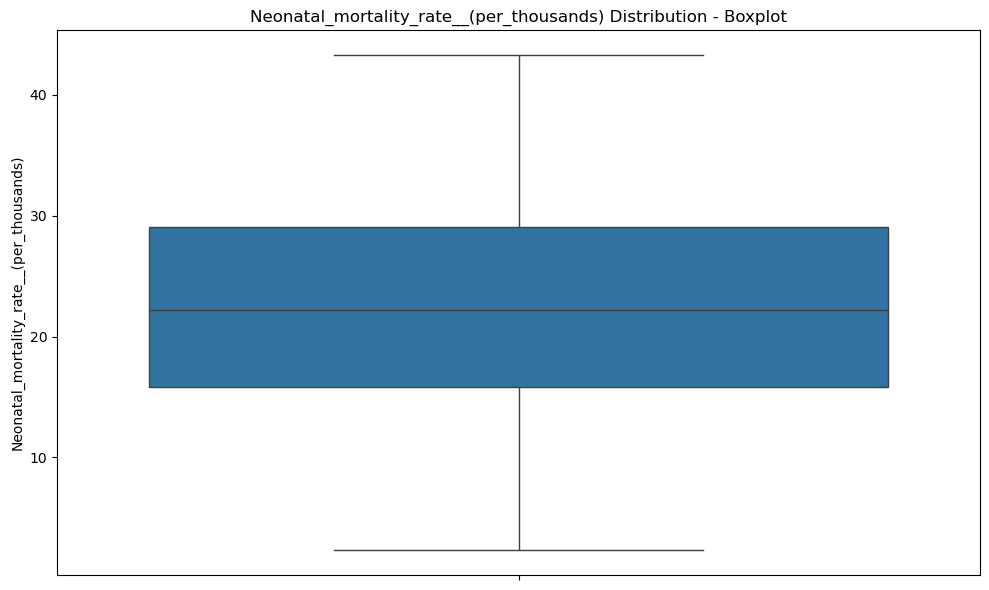


Neonatal_mortality_rate__(per_thousands) value counts:
(2.259, 10.5]     3
(10.5, 18.7]     10
(18.7, 26.9]     11
(26.9, 35.1]      7
(35.1, 43.3]      4
Name: Neonatal_mortality_rate__(per_thousands), dtype: int64

Correlation of other numerical variables with Neonatal_mortality_rate__(per_thousands):
Neonatal_mortality_rate__(per_thousands)                   1.000000
Infant_Mortality_Rate_(per_thousands)                      0.909611
Households_with_a_telephone                                0.347718
Stunting_MICS                                              0.312970
Skin_to_skin_Care                                          0.277537
Basic_sanitation                                           0.212736
Exclusive_breasfeeding                                     0.210535
Child_labour                                               0.209103
Birth_registration                                         0.207488
Households_with_internet                                   0.161609
Households_wit

In [75]:
# Import necessary libraries with additional useful methods
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
#from statsmodels.graphics.mosaicplot import mosaic
import plotly.express as px
import plotly.graph_objects as go


url="https://raw.githubusercontent.com/saalampk/KP_NUT/refs/heads/main/KP_Data_2.csv"
df = pd.read_csv(url)

# Try to import optional libraries, with fallbacks if not available
try:
    from scipy import stats
    scipy_available = True
except ImportError:
    print("SciPy not available. Some statistical functions will be limited.")
    scipy_available = False

try:
    from sklearn.preprocessing import StandardScaler
    sklearn_available = True
except ImportError:
    print("Scikit-learn not available. Preprocessing functions will be limited.")
    sklearn_available = False

try:
    import plotly.express as px
    import plotly.graph_objects as go
    import plotly.io as pio
    pio.renderers.default = 'notebook'  # For Jupyter notebook display
    plotly_available = True
except ImportError:
    print("Plotly not available. Interactive visualizations will be skipped.")
    plotly_available = False

# Assuming df is your DataFrame with 5 rows and 39 columns
# First, let's check if the DataFrame exists and has data
try:
    if 'df' not in locals() and 'df' not in globals():
        print("DataFrame 'df' not found. Please make sure your data is loaded.")
        # Create a sample DataFrame for demonstration
        print("Creating a sample DataFrame for demonstration...")
        np.random.seed(42)
        df = pd.DataFrame({
            'mortality': np.random.choice(['Low', 'Medium', 'High'], size=5),
            'age': np.random.randint(20, 80, size=5),
            'weight': np.random.normal(70, 15, size=5),
            'height': np.random.normal(170, 10, size=5)
        })
        
    # Check if DataFrame is empty
    if df.empty:
        raise ValueError("DataFrame is empty. Please load data before analysis.")
        
    print(f"DataFrame shape: {df.shape} (rows, columns)")
    print("First few rows:")
    print(df.head())
    
    # Look for mortality column or similar
    mortality_col = None
    if 'mortality' in df.columns:
        mortality_col = 'mortality'
    else:
        # Try to find similar column names
        similar_cols = [col for col in df.columns if 'mort' in col.lower()]
        if similar_cols:
            print(f"\nFound columns similar to 'mortality': {similar_cols}")
            mortality_col = similar_cols[0]  # Use the first match
            print(f"Using '{mortality_col}' for analysis")
        else:
            print("\nNo mortality-related columns found. Available columns are:")
            print(df.columns.tolist())
            print("\nPlease specify which column to use for the pie chart.")
            # For demonstration, use the first column that has few unique values
            for col in df.columns:
                if df[col].nunique() <= 10:
                    mortality_col = col
                    print(f"Using '{mortality_col}' for demonstration purposes")
                    break
    
    if mortality_col:
        # Check data type and handle accordingly
        is_numeric = pd.api.types.is_numeric_dtype(df[mortality_col])
        print(f"\nColumn '{mortality_col}' is {'numeric' if is_numeric else 'categorical'}")
        
        # Get value counts
        if is_numeric:
            # For numeric data, create bins for better visualization
            if df[mortality_col].nunique() > 10:
                print("Creating bins for numeric data...")
                # Create 5 bins for the numeric data
                bins = pd.cut(df[mortality_col], bins=5)
                mortality_counts = bins.value_counts().sort_index()
                # Convert interval index to strings for plotting
                mortality_counts.index = [str(interval) for interval in mortality_counts.index]
            else:
                mortality_counts = df[mortality_col].value_counts().sort_index()
        else:
            mortality_counts = df[mortality_col].value_counts()
        
        # Skip visualizations if there's only one unique value
        if len(mortality_counts) <= 1:
            print(f"Warning: '{mortality_col}' has only {len(mortality_counts)} unique value(s).")
            print("Skipping visualizations as they would not be informative.")
        else:
            # Basic statistics
            print("\nBasic statistics:")
            print(df[mortality_col].describe())
            
            # Create the pie chart with matplotlib
            try:
                plt.figure(figsize=(10, 6))
                plt.pie(mortality_counts, labels=mortality_counts.index, autopct='%1.1f%%', startangle=90)
                plt.title(f'Distribution by {mortality_col}')
                plt.axis('equal')
                if len(mortality_counts) > 3:
                    plt.legend(title=f"{mortality_col} Categories", loc="best")
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"Error creating matplotlib pie chart: {e}")
            
            # Create interactive Plotly pie chart if available
            if plotly_available:
                try:
                    fig = px.pie(values=mortality_counts.values, 
                                names=mortality_counts.index, 
                                title=f'Interactive Distribution by {mortality_col}')
                    fig.update_traces(textposition='inside', textinfo='percent+label')
                    fig.show()
                except Exception as e:
                    print(f"Error creating Plotly pie chart: {e}")
            
            # Create a bar chart for comparison
            try:
                plt.figure(figsize=(10, 6))
                sns.barplot(x=mortality_counts.index, y=mortality_counts.values)
                plt.title(f'{mortality_col} Distribution - Bar Chart')
                plt.xlabel(f'{mortality_col} Category')
                plt.ylabel('Count')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
            except Exception as e:
                print(f"Error creating bar chart: {e}")
            
            # If mortality is numerical, create additional visualizations
            if is_numeric:
                try:
                    plt.figure(figsize=(10, 6))
                    sns.histplot(df[mortality_col], kde=True)
                    plt.title(f'{mortality_col} Distribution - Histogram')
                    plt.xlabel(f'{mortality_col} Value')
                    plt.ylabel('Frequency')
                    plt.tight_layout()
                    plt.show()
                    
                    # Add a boxplot
                    plt.figure(figsize=(10, 6))
                    sns.boxplot(y=df[mortality_col])
                    plt.title(f'{mortality_col} Distribution - Boxplot')
                    plt.tight_layout()
                    plt.show()
                except Exception as e:
                    print(f"Error creating histogram/boxplot: {e}")
        
        # Show the actual counts in a table
        print(f"\n{mortality_col} value counts:")
        print(mortality_counts)
        
        # If there are other interesting columns, show correlation with mortality
        if is_numeric and df.shape[1] > 1:
            try:
                print(f"\nCorrelation of other numerical variables with {mortality_col}:")
                numerical_cols = df.select_dtypes(include=[np.number]).columns
                if len(numerical_cols) > 1:  # Need at least 2 numerical columns for correlation
                    correlations = df[numerical_cols].corr()[mortality_col].sort_values(ascending=False)
                    print(correlations)
                else:
                    print("No other numerical columns available for correlation analysis.")
            except Exception as e:
                print(f"Error calculating correlations: {e}")
    else:
        print("No suitable column found for analysis.")

except Exception as e:
    print(f"An error occurred: {e}")
    print("\nDebugging information:")
    import traceback
    traceback.print_exc()